In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/m

In [2]:
data= pd.read_csv('comptagesvelo2015.csv')
data.head()

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


In [3]:
data.columns

Index(['Date', 'Unnamed: 1', 'Berri1', 'Boyer', 'Brébeuf',
       'CSC (Côte Sainte-Catherine)', 'Maisonneuve_1', 'Maisonneuve_2',
       'Maisonneuve_3', 'Notre-Dame', 'Parc', 'Parc U-Zelt Test', 'PierDup',
       'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville', 'Rachel / Papineau',
       'René-Lévesque', 'Saint-Antoine', 'Saint-Laurent U-Zelt Test',
       'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger'],
      dtype='object')

In [4]:
data.shape

(319, 23)

<AxesSubplot:>

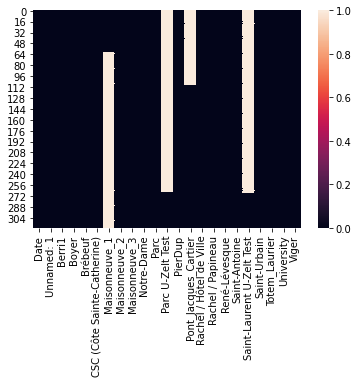

In [5]:
sns.heatmap(data.isnull())

<AxesSubplot:>

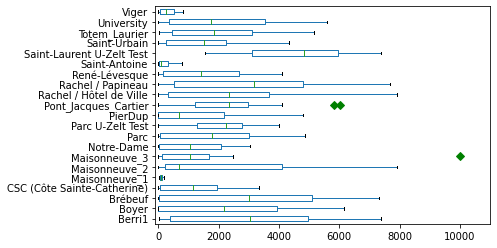

In [6]:
data.plot(kind='box', sym='gD', vert=False, xlim=(-100,11000))

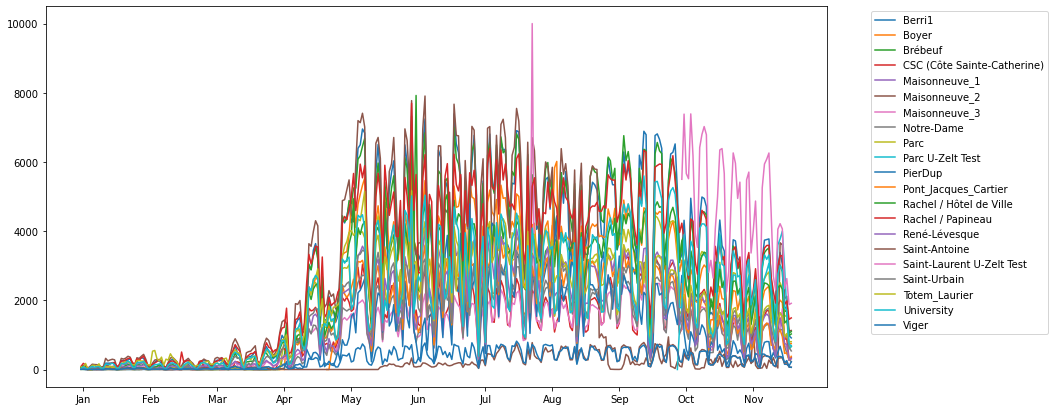

In [7]:
mon=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
plt.figure(figsize=(14,7))
for i in range(2, len(data.columns)):
    plt.plot(data["Date"], data[data.columns[i]], label=data.columns[i])
plt.xticks(np.arange(1,319,30),mon)
plt.legend(loc=2,bbox_to_anchor=(1.05,1))

In [8]:
street_cols=data.columns[2:23]
len(street_cols)

21

In [9]:
data[data["Maisonneuve_3"]==data["Maisonneuve_3"].max()]

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
202,22/07/2015,00:00,5396,4174,5628,2296,NaN,6700,9999,2562,...,2990.0,3849,5288,3301,777,NaN,2575,3928,4088,723


In [10]:
data.fillna(value=0,inplace=True)

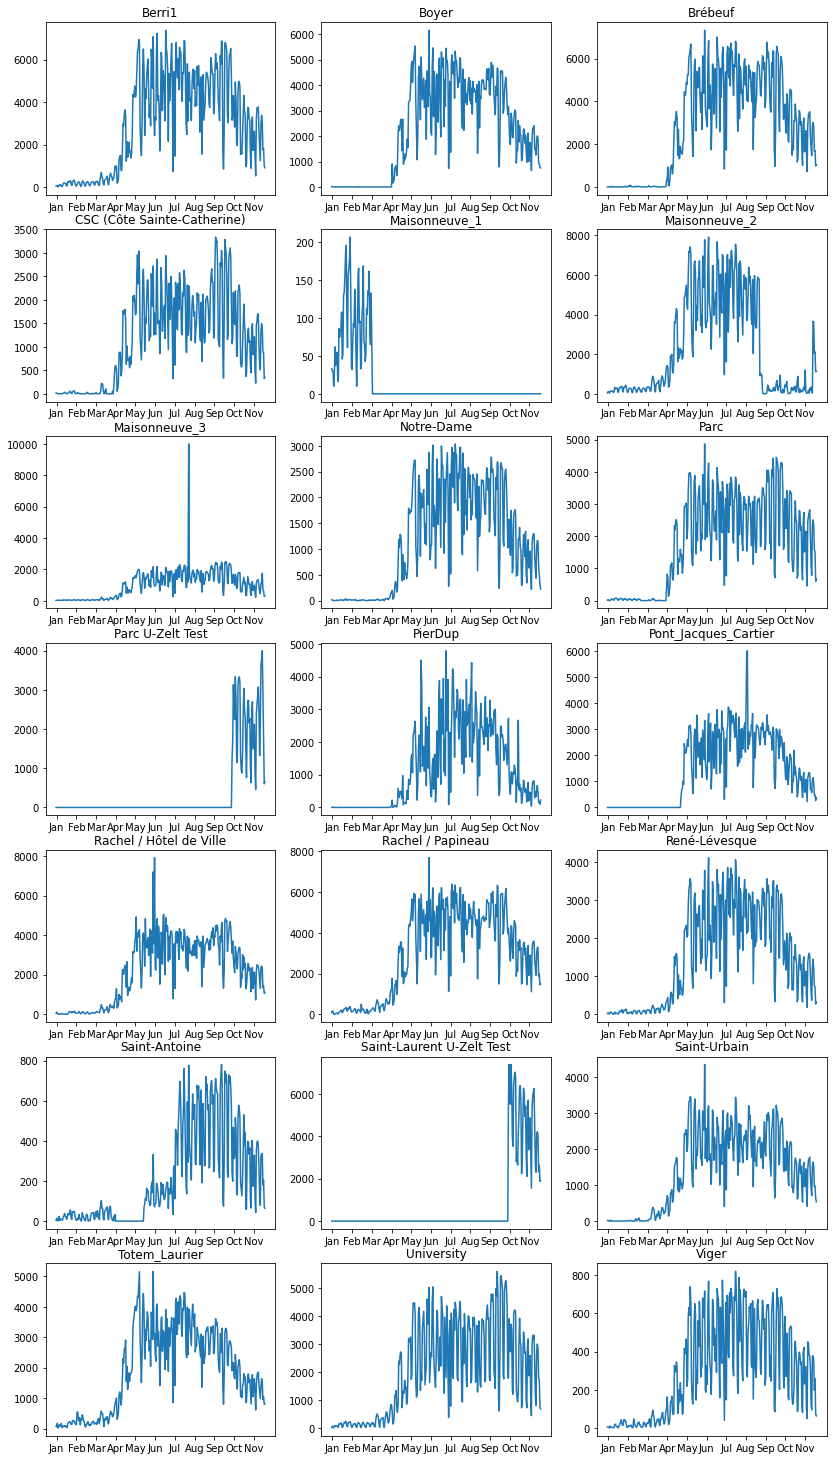

In [11]:
fig = plt.figure(figsize=(14, 26))
columns = 3
rows = 7
ax = []
for i in range(columns*rows):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[i].set_title(street_cols[i])
    plt.setp(ax,xticks=np.arange(1,319,30), xticklabels=mon)
for i in range(len(street_cols)):
    ax[i].plot(data["Date"],data[street_cols[i]],label=street_cols)

In [12]:
def change_date_format(data):
    return datetime.datetime.strptime(data,"%d/%m/%Y")

In [13]:
data["dates"]=data["Date"].apply(change_date_format)

In [14]:
data["month"]=data["dates"].dt.month
data["day"]=data["dates"].dt.day
data["dow"]=data["dates"].dt.dayofweek

In [15]:
val=[]
for i in range(len(data)):
    val.append(data.iloc[i,2:23].values.sum())

In [16]:
data["total"]=val

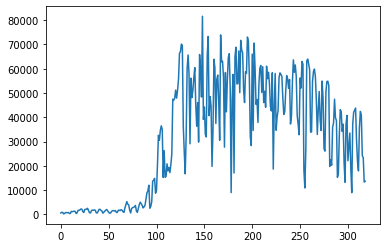

In [17]:
plt.plot(data['total'])

In [18]:
data_date=data[["month","dow","day","total"]]
data_date

,month,dow,day,total
0,1,3,1,531.0
1,1,4,2,804.0
2,1,5,3,774.0
3,1,6,4,158.0
4,1,0,5,371.0
...,...,...,...,...
314,11,2,11,40940.0
315,11,3,12,24175.0
316,11,4,13,23331.0
317,11,5,14,13298.0


<AxesSubplot:>

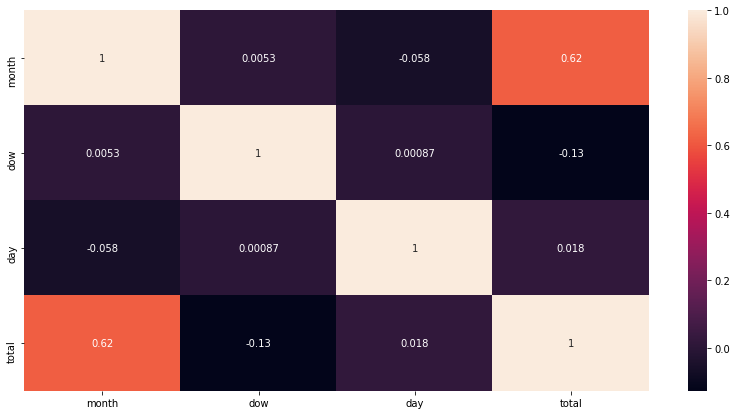

In [19]:
plt.figure(figsize=(14,7))
sns.heatmap(data_date.corr(),annot=True)

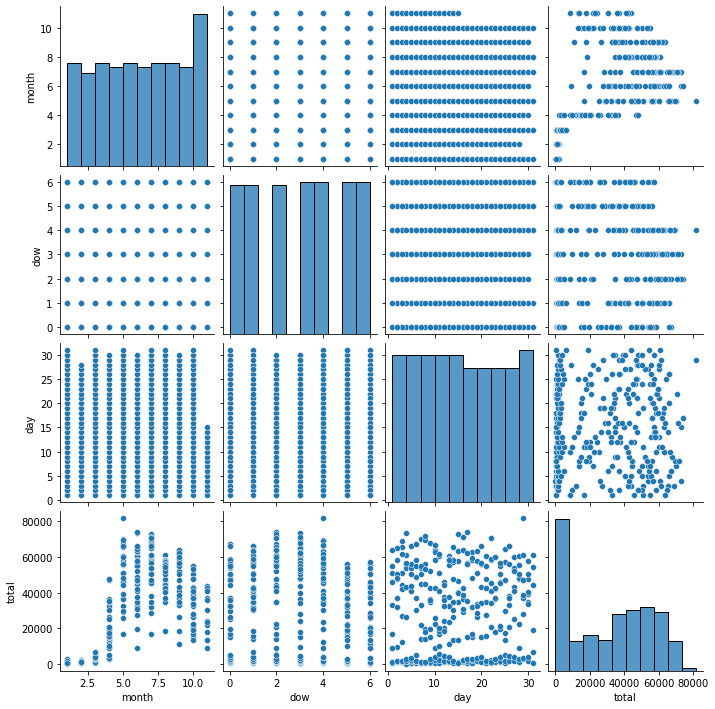

In [20]:
sns.pairplot(data_date)

In [21]:
data_date=data[["month","dow","day","total"]]

In [22]:
X=data_date.drop("total",axis=1)
Y=data_date["total"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

## Linear Regression 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [26]:
model.intercept_

5298.655169246045

In [27]:
model.score(X_test,Y_test)

0.3620858213809478

In [28]:
pred=model.predict(X_test)

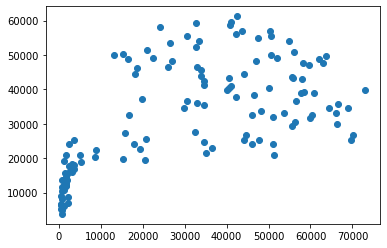

In [29]:
plt.scatter(Y_test,pred)

## Possion Regression

In [30]:
from sklearn import linear_model

In [31]:
p_model = linear_model.PoissonRegressor()

In [32]:
p_model.fit(X_train, Y_train)

PoissonRegressor()

In [33]:
p_pred=p_model.predict(X_test)

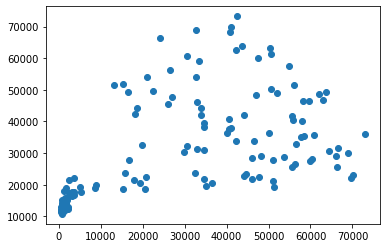

In [34]:
plt.scatter(Y_test,p_pred)